In [1036]:
import numpy as np
import pandas as pd
from DataProcessing import Data
from sklearn.neural_network import MLPRegressor


# 1. Get Data 

## 1.1. Get Data from folder

In [1037]:
d = Data()
d.get_index_names()

S&P 500: ['AAPL', 'ORCL', 'GOOGL', 'AMZN', 'BK', 'LIFE', 'T', 'XOM']
 VN: ['VHM', 'CTR', 'FPT', 'MBB']


['AAPL',
 'ORCL',
 'GOOGL',
 'AMZN',
 'BK',
 'LIFE',
 'T',
 'XOM',
 'VHM',
 'CTR',
 'FPT',
 'MBB']

In [1038]:
chosen_index = 'AMZN'

In [1039]:
d.preprocess(chosen_index)

Processing AMZN.csv


Saved AMZN data at data/processed/AMZN.csv


In [1040]:
df = d.get_data(chosen_index)
df.head()


,Date,Open,High,Low,Close,Volume,RSI,MFI,EMA,SO,MACD,Next Day Price
0,2019-04-01,90.005501,90.783501,89.936501,90.709503,84776000,73.883629,80.337072,88.109599,93.379546,86.463069,90.698997
1,2019-04-02,90.551003,91.000000,90.255997,90.698997,68962000,72.163242,75.257557,88.454852,92.991856,86.740332,91.035004
2,2019-04-03,91.335999,91.500000,90.481003,91.035004,78522000,74.014296,79.697393,88.798872,93.205283,87.092824,90.943001
3,2019-04-04,91.032501,91.437500,90.209999,90.943001,72478000,70.825185,73.028252,89.084756,90.508661,87.388822,91.863998
4,2019-04-05,91.449997,91.929001,91.259499,91.863998,72810000,69.467513,72.386010,89.455322,98.600595,87.832558,92.492996


In [1041]:
df= df.drop(['Date', 'Volume'],axis=1)
df.columns

Index(['Open', 'High', 'Low', 'Close', 'RSI', 'MFI', 'EMA', 'SO', 'MACD',
       'Next Day Price'],
      dtype='object')

# 2. Train model

In [1042]:
X = df[df.columns[0:9]].values
Y = df[df.columns[9]].values

## 2.1. Split data chronologically

In [1043]:
from sklearn.model_selection import  train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=37,shuffle=False)

## 2.2. Scale data

In [1044]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler

df = d.get_data(chosen_index)
df= df.drop(['Date'],axis=1)

df.head()

X = df[df.columns[0:10]].values
Y = df[df.columns[10]].values

X_train_1,X_test_1,Y_train_1,Y_test_1 = train_test_split(X,Y,test_size=0.3,random_state=37,shuffle=False)

scaler = MaxAbsScaler()
X_train_scaled = scaler.fit_transform(X_train_1)
X_test_scaled = scaler.transform(X_test_1)

## 2.3. Scikit-learn Model

In [1045]:
model = MLPRegressor(
    random_state=44,
    activation='relu',
    solver='adam', 
    max_iter=400,
    hidden_layer_sizes=(100, 100, 100),
    )

model.fit(X_train,Y_train)
model.score(X_test,Y_test)
Y_predict = model.predict(X_test)

### Tuned model

In [1046]:
model_tuned = MLPRegressor(
    random_state=44,
    activation='relu',
    solver='adam',
    max_iter=200,
    hidden_layer_sizes=(100, 100, 100, 100, 100),
    early_stopping=True,
    validation_fraction=0.3,
)
model_tuned.fit(X_train, Y_train)
model_tuned.score(X_test, Y_test)
Y_predict_tuned = model_tuned.predict(X_test)

### Scaled data model

In [1047]:
# Model with scaled data (MaxAbsScaler), does not drop Volume
model_scaled_data = MLPRegressor(
    random_state=44,
    activation='relu',
    solver='adam',
    max_iter=200,
    hidden_layer_sizes=(100, 100, 100),
    # early_stopping=True,
    # validation_fraction=0.3,
)
model_scaled_data.fit(X_train_scaled,Y_train_1)
model_scaled_data.score(X_test_scaled,Y_test_1)
Y_predict_scaled = model_scaled_data.predict(X_test_scaled)

# 3. Evaluate model

<Axes: >

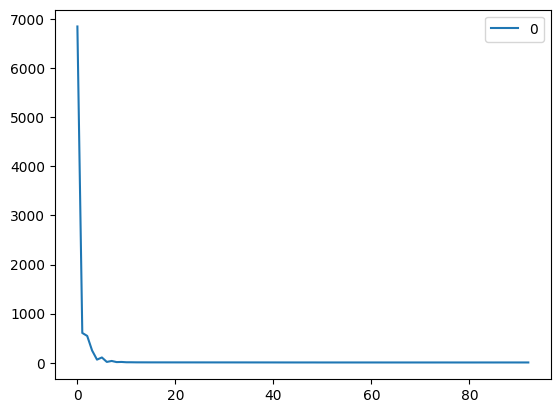

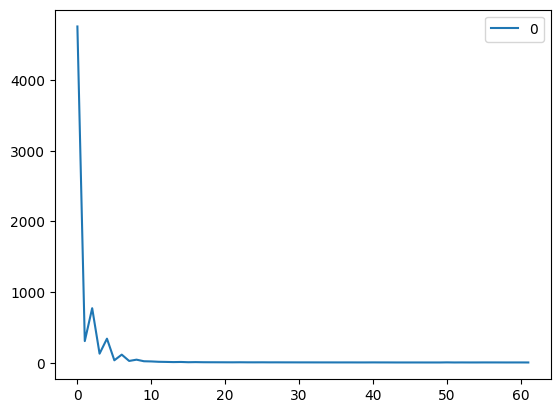

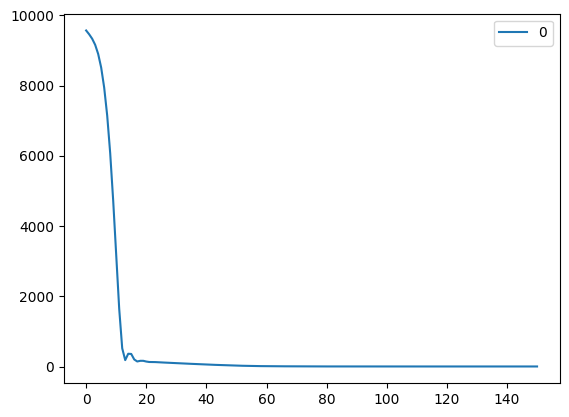

In [1048]:
pd.DataFrame(model.loss_curve_).plot()
pd.DataFrame(model_tuned.loss_curve_).plot()
pd.DataFrame(model_scaled_data.loss_curve_).plot()

In [1049]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


mse = mean_squared_error(Y_test, Y_predict)
mae = mean_absolute_error(Y_test, Y_predict)
r2 = r2_score(Y_test, Y_predict)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

print("Tuned Model")
mse = mean_squared_error(Y_test, Y_predict_tuned)
mae = mean_absolute_error(Y_test, Y_predict_tuned)
r2 = r2_score(Y_test, Y_predict_tuned)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

print("Scaled Data model")
mse = mean_squared_error(Y_test_1, Y_predict_scaled)
mae = mean_absolute_error(Y_test_1, Y_predict_scaled)
r2 = r2_score(Y_test_1, Y_predict_scaled)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 8.586785556270197
Mean Absolute Error: 2.256997888731024
R-squared: 0.9857097974173838
Tuned Model
Mean Squared Error: 8.823809070285785
Mean Absolute Error: 2.2501909039709056
R-squared: 0.9853153408410631
Scaled Data model
Mean Squared Error: 7.746878184826176
Mean Absolute Error: 2.1223534355852953
R-squared: 0.9871075785090291


## Plot Result

In [1050]:
import matplotlib.pyplot as plt

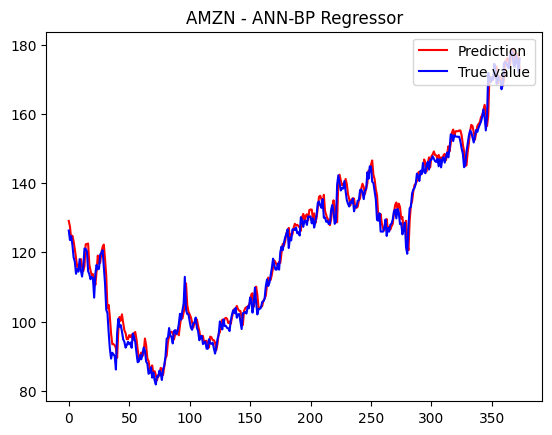

In [1051]:
plt.plot(Y_predict,color='red',label='Prediction')
plt.plot(Y_test,color='blue',label='True value')
plt.legend(loc='upper right')
plt.title(f'{chosen_index} - ANN-BP Regressor')
plt.show()

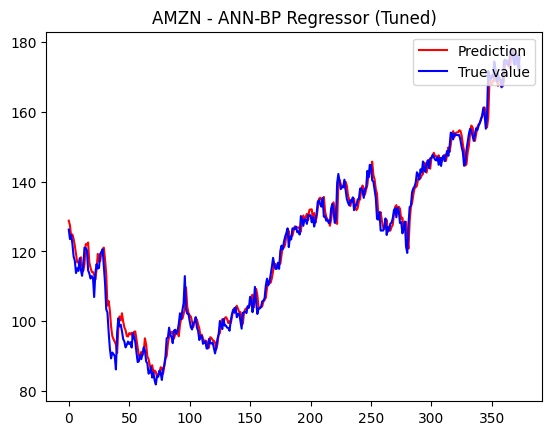

In [1052]:
plt.plot(Y_predict_tuned,color='red',label='Prediction')
plt.plot(Y_test,color='blue',label='True value')
plt.legend(loc='upper right')
plt.title(f'{chosen_index} - ANN-BP Regressor (Tuned)')
plt.show()

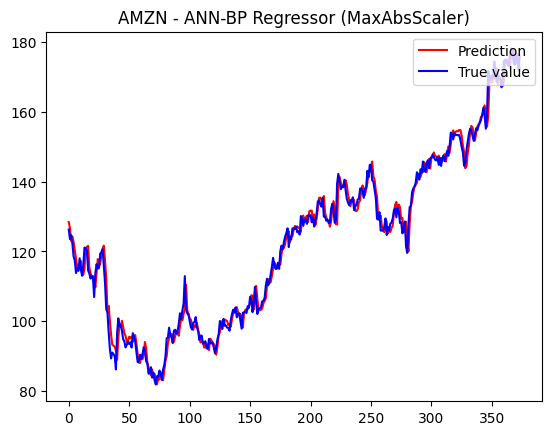

In [1053]:
plt.plot(Y_predict_scaled,color='red',label='Prediction')
plt.plot(Y_test,color='blue',label='True value')
plt.legend(loc='upper right')
plt.title(f'{chosen_index} - ANN-BP Regressor (MaxAbsScaler)')
plt.show()

## Get data

In [1054]:
indices = d.get_index_names()
datasets = []
dataset_names = []
for index in indices:
    # d.preprocess(index)
    df = d.get_data(index)
    df= df.drop(['Date','Volume'],axis=1)

    X = df[df.columns[0:9]].values
    Y = df[df.columns[9]].values
    datasets.append((X,Y))
    dataset_names.append(index)

S&P 500: ['AAPL', 'ORCL', 'GOOGL', 'AMZN', 'BK', 'LIFE', 'T', 'XOM']
 VN: ['VHM', 'CTR', 'FPT', 'MBB']


## Parameter list

In [1055]:
# only identity and relu activation functions give good results
activation_functions = ['identity', 'relu']
# solver does not affect the results
# sgd loss curve cannot be plotted 
solvers = ['lbfgs', 'adam']
# mostly converged under 100 iterations
n_max_iter = [200,400,600,800,1000]
# more hidden layers seem to be more stable and converge faster, but not much
hidden_layer_sizes = [(100,100,100),(100,100,100,100),(100,100,100,100,100)]
# learning rate does not affect the results
learning_rates = ['constant', 'invscaling', 'adaptive']
# default alpha is 0.0001 is good enough
alphas = [0.0001, 0.001, 0.01, 0.1, 1]
# auto is best
batch_sizes = [100, 'auto']
# no effect
power_ts = [0.01, 0.1, 0.5, 1, 2]
# default False is not better for all datasets
# R2 is betteer with early stopping, but MSE and MAE are worse
early_stopping = [True, False]
validation_fraction = [0.1, 0.2, 0.3, 0.4, 0.5]
labels = []

plot_args = [
    {"c": "red", "linestyle": "-"},
    {"c": "green", "linestyle": "-"},
    {"c": "blue", "linestyle": "-"},
    {"c": "red", "linestyle": "--"},
    {"c": "green", "linestyle": "--"},
]

# Plot on datasets


learning on dataset AAPL


vf: 0.1
Mean Squared Error: 7.113608238848562
Mean Absolute Error: 2.048526055962574
R-squared: 0.9816025534766273
vf: 0.2
Mean Squared Error: 7.021284449412316
Mean Absolute Error: 2.023125024501435
R-squared: 0.9818413242835031
vf: 0.3
Mean Squared Error: 6.9793709643573845
Mean Absolute Error: 2.0188314423011033
R-squared: 0.9819497223107793
vf: 0.4
Mean Squared Error: 7.3305368328600276
Mean Absolute Error: 2.0736998072262955
R-squared: 0.9810415256446585
vf: 0.5
Mean Squared Error: 7.392409393766369
Mean Absolute Error: 2.0834969253693734
R-squared: 0.9808815088019651

learning on dataset ORCL
vf: 0.1
Mean Squared Error: 5.36148875318232
Mean Absolute Error: 1.5605267548828758
R-squared: 0.9808958655858114
vf: 0.2
Mean Squared Error: 5.229339248717471
Mean Absolute Error: 1.5322173598156412
R-squared: 0.9813667426149886
vf: 0.3
Mean Squared Error: 5.161910181200963
Mean Absolute Error: 1.5093382229546457
R-squared: 0.9816070068454216
vf: 0.4
Mean Squared Error: 5.011087339539121


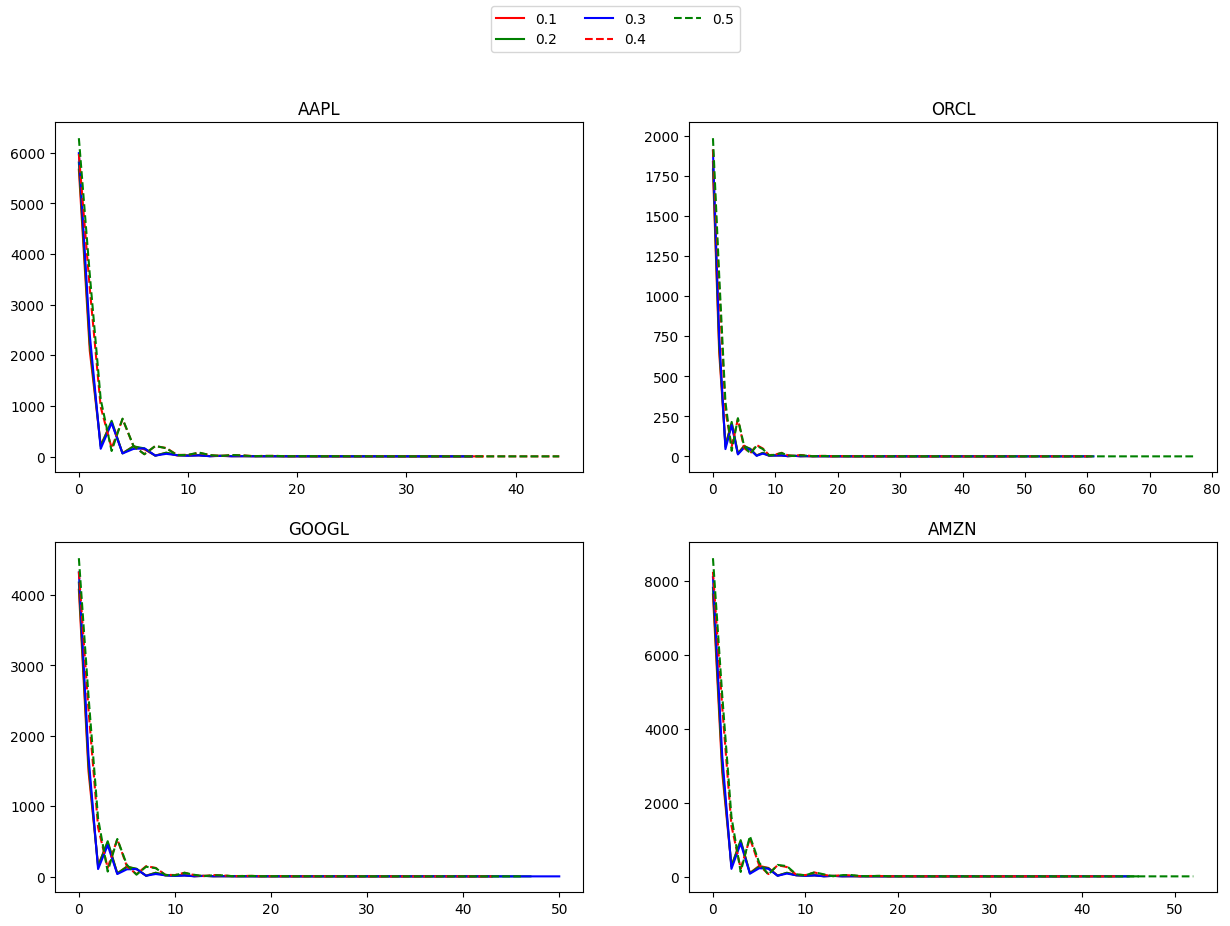

In [1056]:
def plot_on_dataset(X, y, ax, name):
    print("\nlearning on dataset %s" % name)
    ax.set_title(name)

    # X = MinMaxScaler().fit_transform(X)
    models = []

    TRAIN_PERCENT = 0.7
    train_size = int(TRAIN_PERCENT*len(X))

    X_train = X[0:train_size]
    Y_train = y[0:train_size]
    X_test = X[train_size:len(X)]
    Y_test = y[train_size:len(Y)]
    
    for vf in validation_fraction :
        model = MLPRegressor(
            random_state=1,
            activation='relu',
            solver='adam', 
            max_iter=200,
            hidden_layer_sizes=(100,100,100,100,100),
            early_stopping=True,
            validation_fraction=vf,
            )
        model.fit(X_train,Y_train)
        Y_predict = model.predict(X_test)
        mse = mean_squared_error(Y_test, Y_predict)
        mae = mean_absolute_error(Y_test, Y_predict)
        r2 = r2_score(Y_test, Y_predict)

        print("vf:", vf)

        print("Mean Squared Error:", mse)
        print("Mean Absolute Error:", mae)
        print("R-squared:", r2)
        # plot across datasets
        models.append(model)
        labels.append(vf)

    for model, label, args in zip(models, labels, plot_args):
        ax.plot(model.loss_curve_, label=label, **args)

# fig, axes = plt.subplots(6, 2, figsize=(15, 10))
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for ax, data, name in zip(
    # axes.ravel(), datasets, dataset_names
    axes.ravel(), datasets[:4], dataset_names[:4]
):
    plot_on_dataset(*data, ax=ax, name=name)

fig.legend(ax.get_lines(), labels, ncol=3, loc="upper center")
plt.show()

 
        